## UN Data Exploration

#### Q1. Download the Gross Domestic Product (GDP) per capita dataset from http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD. Rename it to gdp_per_capita.csv and place it in the data folder of your project repository.

#### Q2. Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.

#### Q3. In the first cell of your notebook, import the required packages with their customary aliases as follows:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Q4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. After reading it in, inspect the first 10 rows and then inspect the last 10 rows

In [7]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [8]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [9]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


#### Q5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [11]:
#drop column: df.drop(columns=['col_name'])
#rename column: df.rename(columns={""oldname": "newname"})
gdp_df = (
    gdp_df
    .drop(columns=['Value Footnotes'])
    .rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})
)
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


#### Q6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

7662 rows and 3 columns:
1. Country - object
2. Year - integer
3. GDP_Per_Capita - float

In [14]:
gdp_df.shape

(7662, 3)

In [15]:
gdp_df.info()
#gdp_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


#### Q7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

1990 - 2022 (2022 is hidden between 2001 and 2002!)  
The number of observations per year increases over time.

In [18]:
gdp_df['Year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2022, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990],
      dtype=int64)

In [19]:
#gdp_df['Year'].value_counts(sort=False)
gdp_df['Year'].value_counts().sort_index(ascending=False)

Year
2022    232
2021    241
2020    242
2019    242
2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2005    236
2004    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

#### Q8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

242 Countries (and Regions)  
Djibouti and Somalia have the fewest entries; they didn't start reporting or tracking until 2013 (maybe it's voluntary?)?

In [22]:
gdp_df['Country'].nunique()

242

In [23]:
gdp_df['Country'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
 

In [24]:
gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [25]:
gdp_df['Country'].value_counts().value_counts(sort=False)

count
33    202
32      5
31      3
30      1
29      2
28     10
26      2
25      1
24      1
23      4
22      3
20      1
19      1
16      1
15      1
14      1
12      1
10      2
Name: count, dtype: int64

In [26]:
gdp_df.loc[gdp_df['Country'] == 'Djibouti']

,Country,Year,GDP_Per_Capita
1694,Djibouti,2022,4991.016244
1695,Djibouti,2021,4912.671543
1696,Djibouti,2020,4753.887886
1697,Djibouti,2019,4768.113005
1698,Djibouti,2018,4589.378326
1699,Djibouti,2017,4451.683846
1700,Djibouti,2016,4291.297376
1701,Djibouti,2015,4073.622455
1702,Djibouti,2014,3854.269956
1703,Djibouti,2013,3664.268036


In [27]:
gdp_df.loc[gdp_df['Country'] == 'Somalia']

,Country,Year,GDP_Per_Capita
6271,Somalia,2022,1155.275773
6272,Somalia,2021,1136.735989
6273,Somalia,2020,1127.418534
6274,Somalia,2019,1138.285937
6275,Somalia,2018,1098.492832
6276,Somalia,2017,1059.143932
6277,Somalia,2016,1076.198333
6278,Somalia,2015,1029.699218
6279,Somalia,2014,925.577067
6280,Somalia,2013,889.166677


In [28]:
gdp_df.loc[gdp_df['Country'] == 'Afghanistan']

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
5,Afghanistan,2016,2101.422187
6,Afghanistan,2015,2108.714173
7,Afghanistan,2014,2144.449634
8,Afghanistan,2013,2165.340915
9,Afghanistan,2012,2122.830759


#### Q9. Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021

In [30]:
gdp_2021 = gdp_df.loc[gdp_df['Year'] == 2021]
#gdp_2021 = gdp_df[gdp_df['Year'] == 2021]
gdp_2021

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
21,Africa Eastern and Southern,2021,3519.174840
54,Africa Western and Central,2021,4014.607965
87,Albania,2021,14595.944386
120,Algeria,2021,11029.138782
...,...,...,...
7502,Viet Nam,2021,10628.219166
7535,West Bank and Gaza,2021,5641.044400
7564,World,2021,17055.357429
7597,Zambia,2021,3236.788981


#### Q10. Use .describe() to find the summary statistics for GDP per capita in 2021.

In [32]:
gdp_2021['GDP_Per_Capita'].describe()

count       241.000000
mean      20711.570080
std       20916.978968
min         714.066712
25%        5044.196028
50%       13754.802423
75%       30974.370692
max      115683.493708
Name: GDP_Per_Capita, dtype: float64

#### Q11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

The distribution is heavily right-skewed, with most countries/regions at or below a GDP per Capita of 20K.

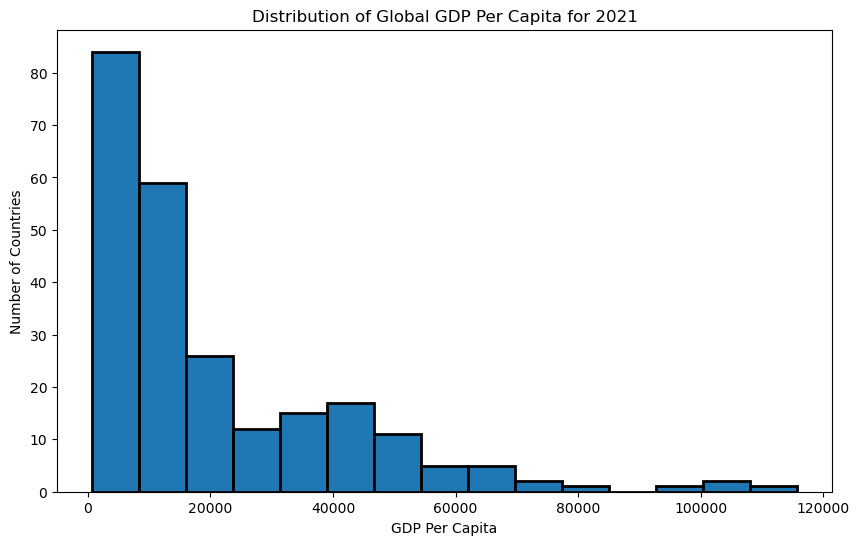

In [35]:
fig,ax = plt.subplots(figsize = (10,6))   

plt.hist(
    data=gdp_2021,
    x='GDP_Per_Capita',
    edgecolor='Black',
    linewidth=2,
    bins = 15
    );
plt.xlabel('GDP Per Capita')                            
plt.ylabel('Number of Countries')
plt.title('Distribution of Global GDP Per Capita for 2021');

#### Q12. Find the top 5 countries and bottom 5 countries by GDP per capita in 2021.

In [37]:
gdp_2021.sort_values('GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515
...,...,...,...
5073,Niger,2021,1186.576809
6272,Somalia,2021,1136.735989
1629,Dem. Rep. Congo,2021,1073.643271
1216,Central African Republic,2021,837.504686


#### Q13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [39]:
gdp_pivotedtotal = gdp_df.pivot_table(values = "GDP_Per_Capita", index = "Country", columns = 'Year')
gdp_pivotedtotal

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2165.340915,2144.449634,2108.714173,2101.422187,2096.093111,2060.698973,2079.921861,1968.341002,1517.016266,NaN
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7257.729273,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469
West Bank and Gaza,NaN,NaN,NaN,NaN,3951.205493,4047.128488,3916.925775,4294.746098,4786.480236,5052.064072,...,6118.257181,5967.073437,6048.976597,6438.933640,6401.740891,6318.210068,6245.448697,5402.538773,5641.044400,5722.409175
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,14801.332173,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316


In [40]:
gdp_subset = gdp_df[gdp_df["Year"].isin([1990, 2001])]
gdp_subset

,Country,Year,GDP_Per_Capita
41,Africa Eastern and Southern,2001,2928.062946
52,Africa Eastern and Southern,1990,3037.297466
74,Africa Western and Central,2001,2734.257633
85,Africa Western and Central,1990,2788.301039
107,Albania,2001,6441.440698
...,...,...,...
7595,World,1990,9705.981267
7617,Zambia,2001,2142.787524
7628,Zambia,1990,2290.039226
7650,Zimbabwe,2001,2772.325234


In [41]:
gdp_pivoted = gdp_subset.pivot_table(values = "GDP_Per_Capita", index = "Country", columns = 'Year')
gdp_pivoted

Year,1990,2001
Country,,
Africa Eastern and Southern,3037.297466,2928.062946
Africa Western and Central,2788.301039,2734.257633
Albania,4827.027705,6441.440698
Algeria,8828.874473,8926.110134
Angola,5793.084512,4768.008894
...,...,...
Viet Nam,2099.394649,3879.338958
West Bank and Gaza,NaN,3980.933349
World,9705.981267,11221.662910


In [42]:
gdp_pivoted = gdp_pivoted.dropna()
gdp_pivoted

Year,1990,2001
Country,,
Africa Eastern and Southern,3037.297466,2928.062946
Africa Western and Central,2788.301039,2734.257633
Albania,4827.027705,6441.440698
Algeria,8828.874473,8926.110134
Angola,5793.084512,4768.008894
...,...,...
Vanuatu,2774.138350,2782.053642
Viet Nam,2099.394649,3879.338958
World,9705.981267,11221.662910


#### Q14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [44]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2001] - gdp_pivoted[1990]) / gdp_pivoted[1990]
gdp_pivoted

C:\Users\Maria\AppData\Local\Temp\ipykernel_20928\3610817083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2001] - gdp_pivoted[1990]) / gdp_pivoted[1990]


Year,1990,2001,Percent_Change
Country,,,
Africa Eastern and Southern,3037.297466,2928.062946,-3.596438
Africa Western and Central,2788.301039,2734.257633,-1.938220
Albania,4827.027705,6441.440698,33.445281
Algeria,8828.874473,8926.110134,1.101337
Angola,5793.084512,4768.008894,-17.694816
...,...,...,...
Vanuatu,2774.138350,2782.053642,0.285324
Viet Nam,2099.394649,3879.338958,84.783693
World,9705.981267,11221.662910,15.615955


#### Q15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [46]:
gdp_pivoted['Percent_Change'].agg(lambda x: sum(x < 0))

56

#### Q16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

Equatorial Guinea	1543.403611%  
China	160.716880%  
EG GDP per capita has a meteoric rise until about 2009, at which point it begins to trends downward; whereas China trends upward more gradually

In [49]:
gdp_pivoted.sort_values('Percent_Change', ascending = False)

Year,1990,2001,Percent_Change
Country,,,
Equatorial Guinea,936.419751,15389.155994,1543.403611
China,1423.896348,3712.338132,160.716880
Cabo Verde,1816.024743,4278.757830,135.611208
Lebanon,5855.805213,12978.278789,121.630985
East Asia & Pacific (excluding high income),2191.972060,4243.734057,93.603474
...,...,...,...
Azerbaijan,7616.910275,4360.459441,-42.752911
Ukraine,16428.480469,8242.703125,-49.826747
Georgia,11135.462889,5236.222806,-52.977053


#### Q16 Bonus: Put both line charts on the same plot.

In [51]:
gdp_top2 = gdp_df[gdp_df['Country'].isin(['Equatorial Guinea', 'China'])]
gdp_top2 = gdp_top2[gdp_top2['Year'] < 2019]
gdp_top2

,Country,Year,GDP_Per_Capita
1351,China,2018,15133.995618
1352,China,2017,14243.532611
1353,China,2016,13399.137320
1354,China,2015,12612.351651
1355,China,2014,11851.404218
1356,China,2013,11101.938930
1357,China,2012,10370.726572
1358,China,2011,9680.097700
1359,China,2010,8884.588031
1360,China,2009,8069.354638


In [52]:
gdp_pivoted_top2 = gdp_top2.pivot_table(values = "GDP_Per_Capita", index = 'Year', columns = 'Country')
gdp_pivoted_top2

Country,China,Equatorial Guinea
Year,,
1990,1423.896348,936.419751
1991,1534.705272,893.097341
1992,1731.657215,1159.738622
1993,1949.534268,1240.908573
1994,2178.924057,1394.786465
1995,2391.477116,1578.049440
1996,2601.363426,2530.198770
1997,2812.711135,6084.623075
1998,3004.427342,7242.224926


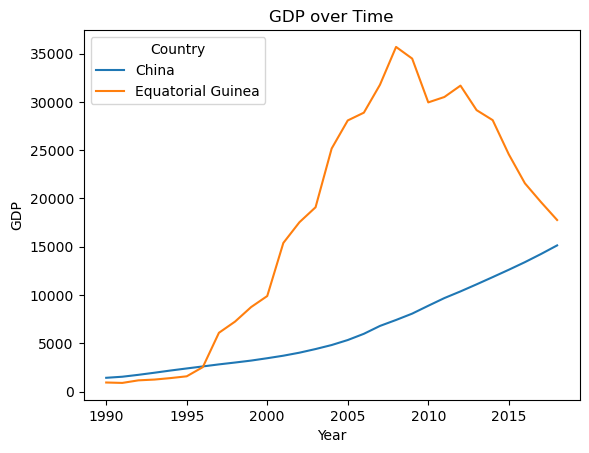

In [53]:
gdp_pivoted_top2.plot()
plt.title('GDP over Time')
plt.ylabel('GDP');

Country
China                Axes(0.125,0.11;0.775x0.77)
Equatorial Guinea    Axes(0.125,0.11;0.775x0.77)
dtype: object

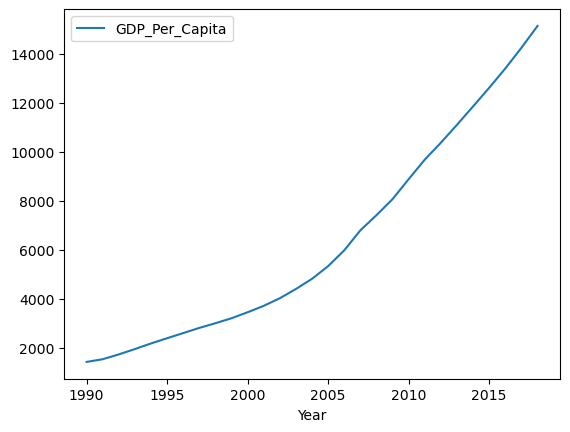

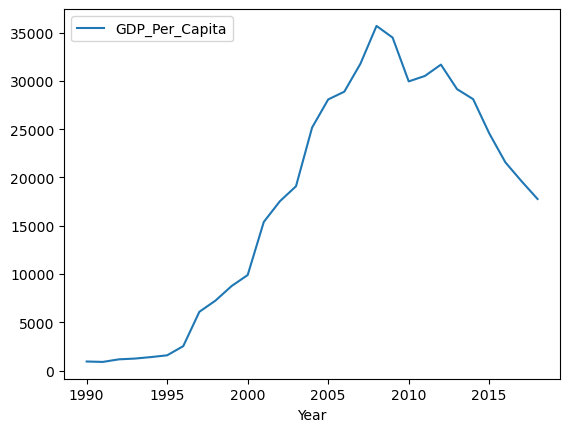

In [66]:
gdp_top2.groupby('Country').plot(x='Year')

#### Q17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [68]:
continents = pd.read_csv('../data/continents.csv')
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


#### Q18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [71]:
gdp_df = pd.merge(gdp_df, continents, on = 'Country', how = 'inner', validate='many_to_one')
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
1,Afghanistan,2020,1968.341002,Asia
2,Afghanistan,2019,2079.921861,Asia
3,Afghanistan,2018,2060.698973,Asia
4,Afghanistan,2017,2096.093111,Asia
...,...,...,...,...
5888,Zimbabwe,1994,2670.106615,Africa
5889,Zimbabwe,1993,2458.783255,Africa
5890,Zimbabwe,1992,2468.278257,Africa
5891,Zimbabwe,1991,2781.787843,Africa


#### Q19. Determine the number of countries per continent. Create a bar chart showing this.

In [74]:
gdp_df['Country'].nunique()

186

In [76]:
co_subset = gdp_df[['Country', 'Continent']]
co_subset

,Country,Continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
5888,Zimbabwe,Africa
5889,Zimbabwe,Africa
5890,Zimbabwe,Africa
5891,Zimbabwe,Africa


In [78]:
co_subset = co_subset.drop_duplicates(subset=['Country'])
co_subset

,Country,Continent
0,Afghanistan,Asia
20,Albania,Europe
53,Algeria,Africa
86,Angola,Africa
119,Antigua and Barbuda,North America
...,...,...
5732,Uzbekistan,Asia
5765,Vanuatu,Oceania
5798,West Bank and Gaza,Asia
5827,Zambia,Africa


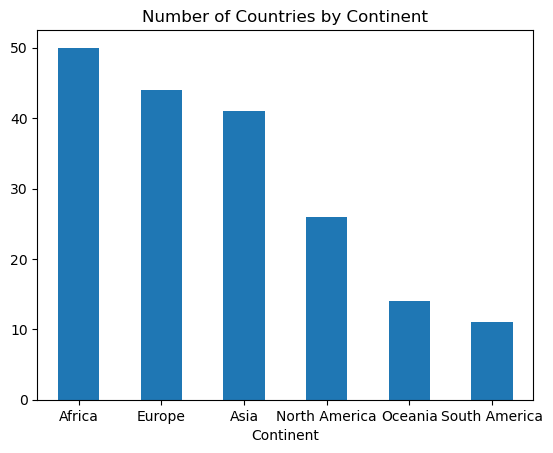

In [80]:
co_subset['Continent'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Number of Countries by Continent');

#### Q20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

Europe and Asia have a lot more variability, and a couple of pretty extreme outliers; Africa, despite having more countries that any other continent has very little variability, and is also at the lower end for GDP per capita

In [84]:
gdp_subset2021 = gdp_df.loc[gdp_df['Year'] == 2021]
gdp_subset2021

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
21,Albania,2021,14595.944386,Europe
54,Algeria,2021,11029.138782,Africa
87,Angola,2021,5911.835657,Africa
120,Antigua and Barbuda,2021,19899.882425,North America
...,...,...,...,...
5733,Uzbekistan,2021,7800.501501,Asia
5766,Vanuatu,2021,2800.493866,Oceania
5799,West Bank and Gaza,2021,5641.044400,Asia
5828,Zambia,2021,3236.788981,Africa


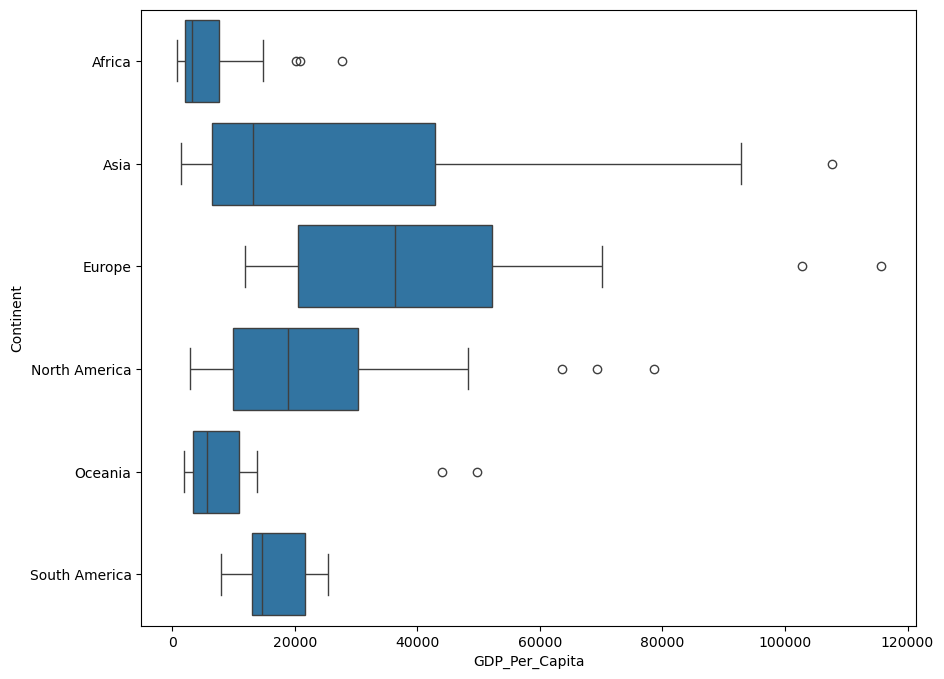

In [86]:
plt.figure(figsize = (10,8))
sns.boxplot(data = gdp_subset2021.sort_values('Continent'), x = 'GDP_Per_Capita', y ='Continent');

#### Q21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.


In [89]:
#skiprows argument added to skip over 'header' rows that were messing up the parsing of the dataset
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_31632/API_SP.DYN.LE00.IN_DS2_en_csv_v2_31632.csv', skiprows=4)
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,...,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,79.524000,NaN,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,...,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,63.720000,NaN,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,...,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,61.480000,NaN,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,...,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,61.803000,NaN,NaN


#### Q22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [92]:
life_expectancy = life_expectancy.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
life_expectancy

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,66.063000,66.439000,66.757000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,45.249105,45.924905,46.223097,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,35.453000,35.924000,36.418000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,39.837827,39.471500,40.085679,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,38.757000,39.092000,39.484000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,63.323000,63.653000,63.935000,...,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,79.524000,NaN,NaN
262,"Yemen, Rep.",33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,36.097000,36.866000,37.796000,...,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,63.720000,NaN,NaN
263,South Africa,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,54.391000,54.626000,54.876000,...,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,61.480000,NaN,NaN
264,Zambia,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,50.679000,50.802000,50.856000,...,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,61.803000,NaN,NaN


In [94]:
life_expectancy = (
    life_expectancy
    .melt(id_vars = 'Country Name', var_name = 'Year', value_name = 'Life Expectancy')
    .rename(columns={'Country Name': 'Country'})
)
life_expectancy

,Country,Year,Life Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
17285,Kosovo,Unnamed: 68,NaN
17286,"Yemen, Rep.",Unnamed: 68,NaN
17287,South Africa,Unnamed: 68,NaN
17288,Zambia,Unnamed: 68,NaN


In [96]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          17290 non-null  object 
 1   Year             17290 non-null  object 
 2   Life Expectancy  16124 non-null  float64
dtypes: float64(1), object(2)
memory usage: 405.4+ KB


#### Q23. What was the first country with a life expectancy to exceed 80?

Japan, 1996

In [100]:
life_expectancy = life_expectancy.dropna()
life_expectancy

,Country,Year,Life Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
16753,Kosovo,2022,79.524000
16754,"Yemen, Rep.",2022,63.720000
16755,South Africa,2022,61.480000
16756,Zambia,2022,61.803000


In [102]:
life_expectancy[life_expectancy['Life Expectancy'] >= 80]

,Country,Year,Life Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.112195
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16692,Qatar,2022,81.559000
16700,Singapore,2022,82.895122
16714,Slovenia,2022,81.282927
16715,Sweden,2022,83.109756


#### Q24. Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [105]:
life_expectancy['Year'] = life_expectancy['Year'].astype(int)

C:\Users\Maria\AppData\Local\Temp\ipykernel_20928\2397042444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_expectancy['Year'] = life_expectancy['Year'].astype(int)


In [107]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16124 entries, 0 to 16757
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          16124 non-null  object 
 1   Year             16124 non-null  int32  
 2   Life Expectancy  16124 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 440.9+ KB


In [109]:
life_expectancy

,Country,Year,Life Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
16753,Kosovo,2022,79.524000
16754,"Yemen, Rep.",2022,63.720000
16755,South Africa,2022,61.480000
16756,Zambia,2022,61.803000


In [111]:
gdp_le = pd.merge(gdp_df, life_expectancy, on = ['Country', 'Year'] , how = 'inner', validate='one_to_one')
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091


#### Q25. Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

31

In [115]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862
5377,Vanuatu,2021,2800.493866,Oceania,70.449
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473
5439,Zambia,2021,3236.788981,Africa,61.223


In [119]:
gdp_le_2021['Life Expectancy'].agg(lambda x: sum(x >= 80))

31

#### Q26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [153]:
gdp_le_2021['GDP_Per_Capita'].sort_values(ascending=False)

2857    115683.493708
4364    107741.118436
2285    102785.490239
4082     92862.571798
581      78570.489515
            ...      
3368      1226.766964
3618      1186.576809
4489      1136.735989
1004       837.504686
840        714.066712
Name: GDP_Per_Capita, Length: 173, dtype: float64

In [157]:
gdp_le_2021_top3 = gdp_le_2021[gdp_le_2021['GDP_Per_Capita'] > 100000]
gdp_le_2021_top3

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
2285,Ireland,2021,102785.490239,Europe,82.353659
2857,Luxembourg,2021,115683.493708,Europe,82.597561
4364,Singapore,2021,107741.118436,Asia,83.092683


In [161]:
gdp_le_top3 = gdp_le[gdp_le['Country'].isin(['Ireland', 'Luxembourg', 'Singapore'])]
gdp_le_top3

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
2284,Ireland,2022,113870.785550,Europe,83.056098
2285,Ireland,2021,102785.490239,Europe,82.353659
2286,Ireland,2020,91356.855054,Europe,82.556098
2287,Ireland,2019,86925.906582,Europe,82.702439
2288,Ireland,2018,83575.599241,Europe,82.204878
...,...,...,...,...,...
4391,Singapore,1994,46865.416894,Asia,76.197561
4392,Singapore,1993,43528.860736,Asia,76.046341
4393,Singapore,1992,40054.049796,Asia,75.946341
4394,Singapore,1991,38705.653871,Asia,75.646341


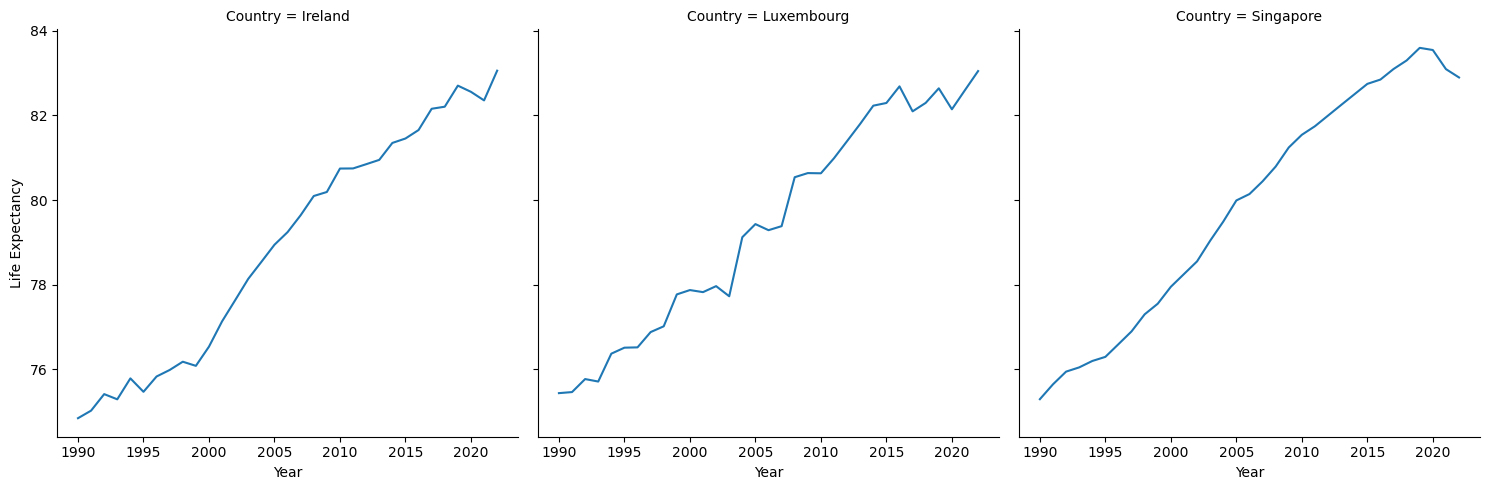

In [189]:
sns.relplot(
    data = gdp_le_top3, x='Year', y='Life Expectancy',
    col='Country',
    kind='line'
)

<Axes: xlabel='Year', ylabel='Life Expectancy'>

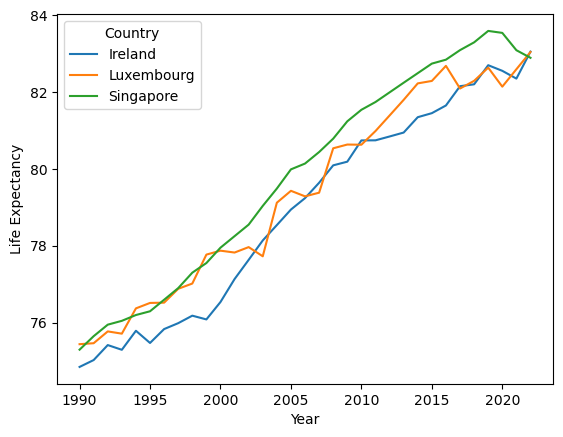

In [183]:
#needed this step to figure out how to do above :)
sns.lineplot(data=gdp_le_top3, x="Year", y="Life Expectancy", hue="Country")

#### Q27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

It appears that there is a positive correlation between life expectancy and GDP per capita, so as one increases, so does the other.
But it would also appear that if one were to draw a line, it would be more curved than straight, looking more like an exponential/logarithmic function?

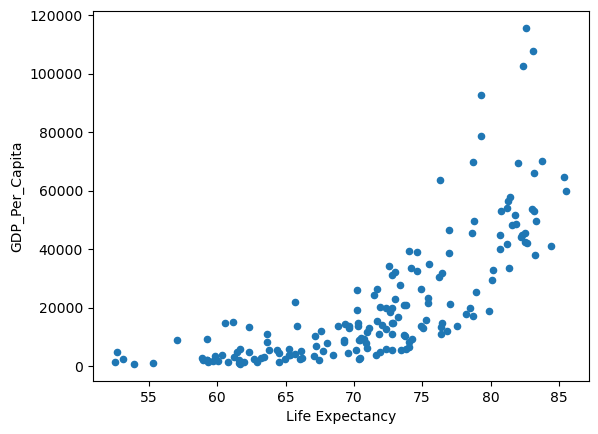

In [196]:
gdp_le_2021.plot(
    kind="scatter",
    x="Life Expectancy",
    y="GDP_Per_Capita"
);

#### Q28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

Corr coeff = 0.745; this would suggest that there is a fairly strong relationship between the two variables (i.e. how likely knowing one can help us predict the other)

In [198]:
gdp_le_2021[['Life Expectancy', 'GDP_Per_Capita']].corr()

,Life Expectancy,GDP_Per_Capita
Life Expectancy,1.000000,0.745081
GDP_Per_Capita,0.745081,1.000000


#### Q29. Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

The scatterplot looks far more linear after using the Log10 values for GDP per capita.

In [216]:
gdp_le_2021['Log10 GDP_Per_Capita'] = np.log10(gdp_le_2021['GDP_Per_Capita'])
gdp_le_2021

C:\Users\Maria\AppData\Local\Temp\ipykernel_20928\2272082162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['Log10 GDP_Per_Capita'] = np.log10(gdp_le_2021['GDP_Per_Capita'])


,Country,Year,GDP_Per_Capita,Continent,Life Expectancy,Log10 GDP_Per_Capita
0,Afghanistan,2021,1517.016266,Asia,61.982,3.180990
21,Albania,2021,14595.944386,Europe,76.463,4.164232
54,Algeria,2021,11029.138782,Africa,76.377,4.042542
87,Angola,2021,5911.835657,Africa,61.643,3.771722
120,Antigua and Barbuda,2021,19899.882425,North America,78.497,4.298851
...,...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862,3.892123
5377,Vanuatu,2021,2800.493866,Oceania,70.449,3.447235
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473,3.751360
5439,Zambia,2021,3236.788981,Africa,61.223,3.510114


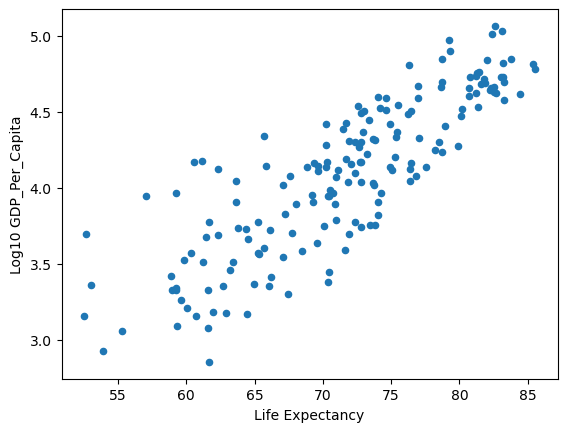

In [220]:
gdp_le_2021.plot(
    kind="scatter",
    x="Life Expectancy",
    y="Log10 GDP_Per_Capita"
);